In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [4]:
crime_data=pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime_data.shape

(50, 5)

In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [11]:
crime_data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [12]:
crime_data.duplicated().sum()

0

In [13]:
crime_data.describe(include='all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [15]:
crime_data.rename(columns={"Unnamed: 0":"States"}, inplace=True)
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
scalar=MinMaxScaler()
scalar=scalar.fit_transform(crime_data.iloc[:,1:])

In [18]:
scaled_data=pd.DataFrame(scalar,columns=['Murder','Assault','UrbanPop','Rape'])
scaled_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


**Hierarchical Clustering**

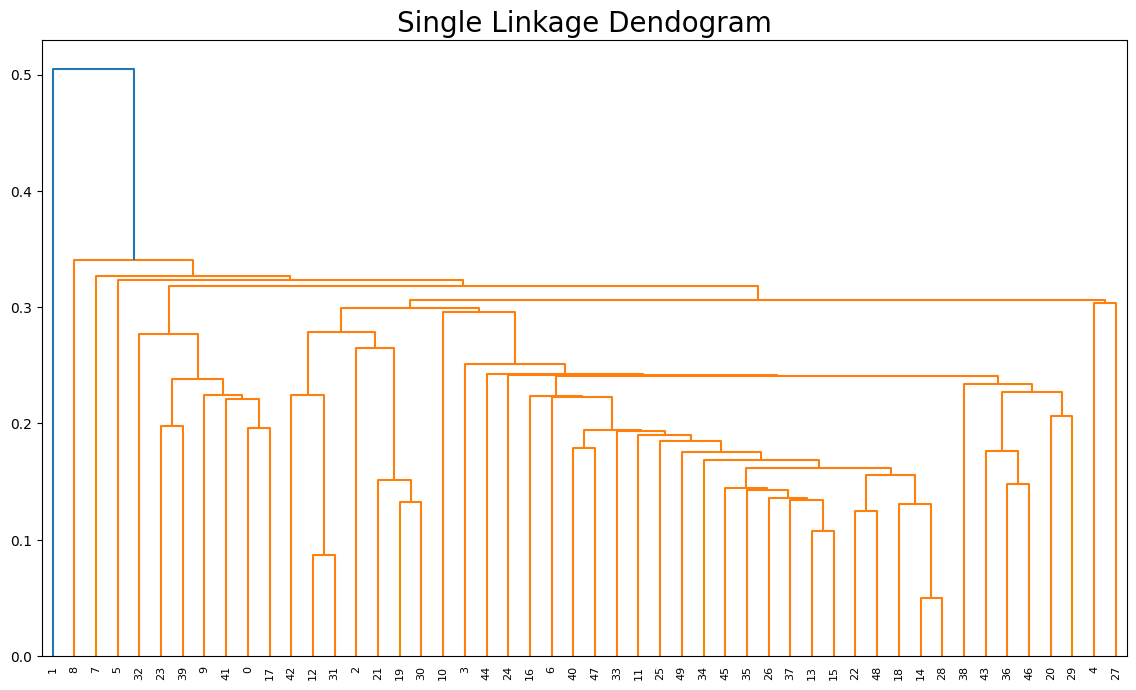

In [20]:
fig=plt.figure(figsize=(14,8))
dendogram=sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.title('Single Linkage Dendogram', size=20)
plt.show()

In [21]:
hie_clustering_1= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')

In [22]:
pred_y_1=hie_clustering_1.fit_predict(scaled_data)

In [23]:
crime_data['Cluster']=pred_y_1
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [24]:
crime_data['Cluster'].value_counts()

0    49
1     1
Name: Cluster, dtype: int64

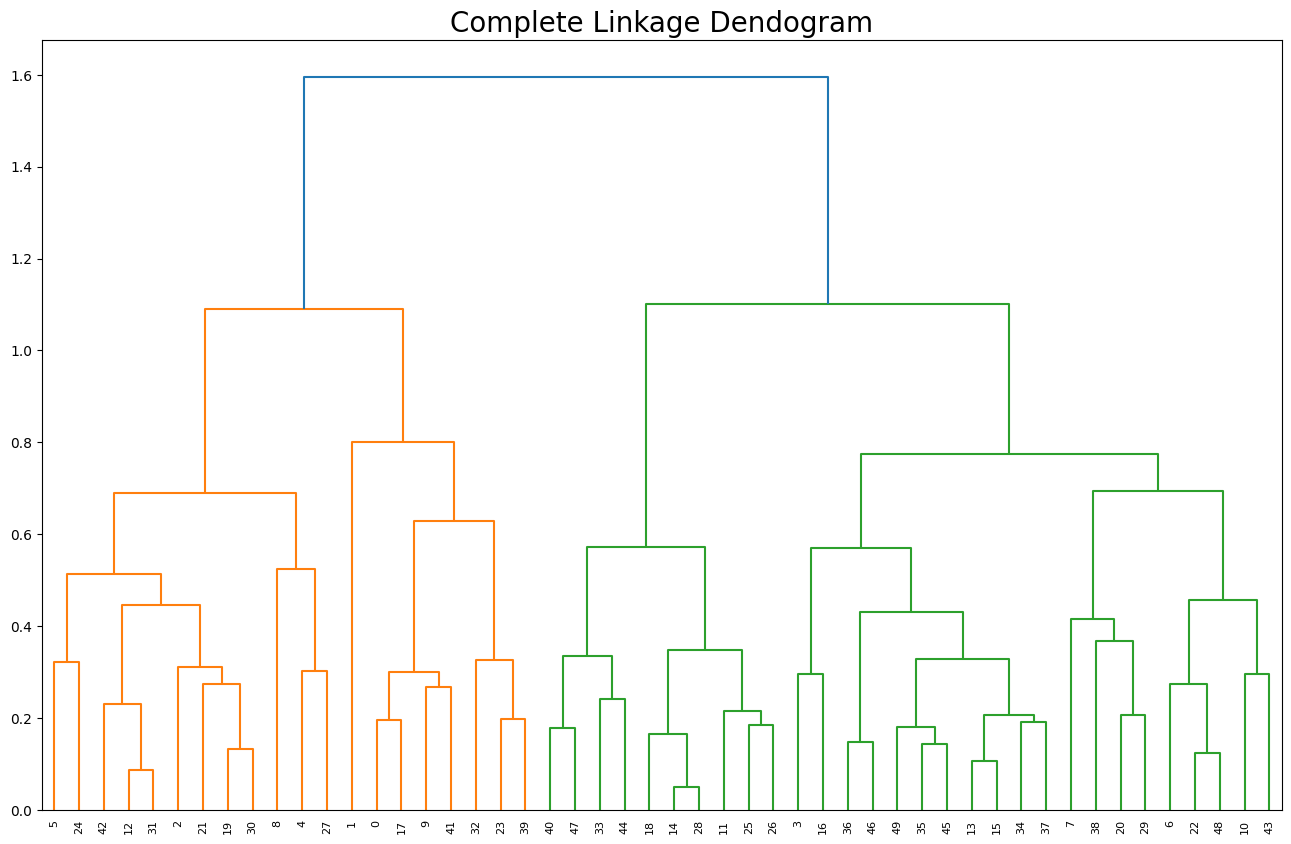

In [25]:
fig=plt.figure(figsize=(16,10))
dendogram=sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.title('Complete Linkage Dendogram', size=20)
plt.show()

In [27]:
hie_clustering_2=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')

In [28]:
pred_y_2=hie_clustering_2.fit_predict(scaled_data)

In [29]:
crime_data['Cluster']=pred_y_2
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [30]:
crime_data['Cluster'].value_counts()

1    20
3    12
2    10
0     8
Name: Cluster, dtype: int64

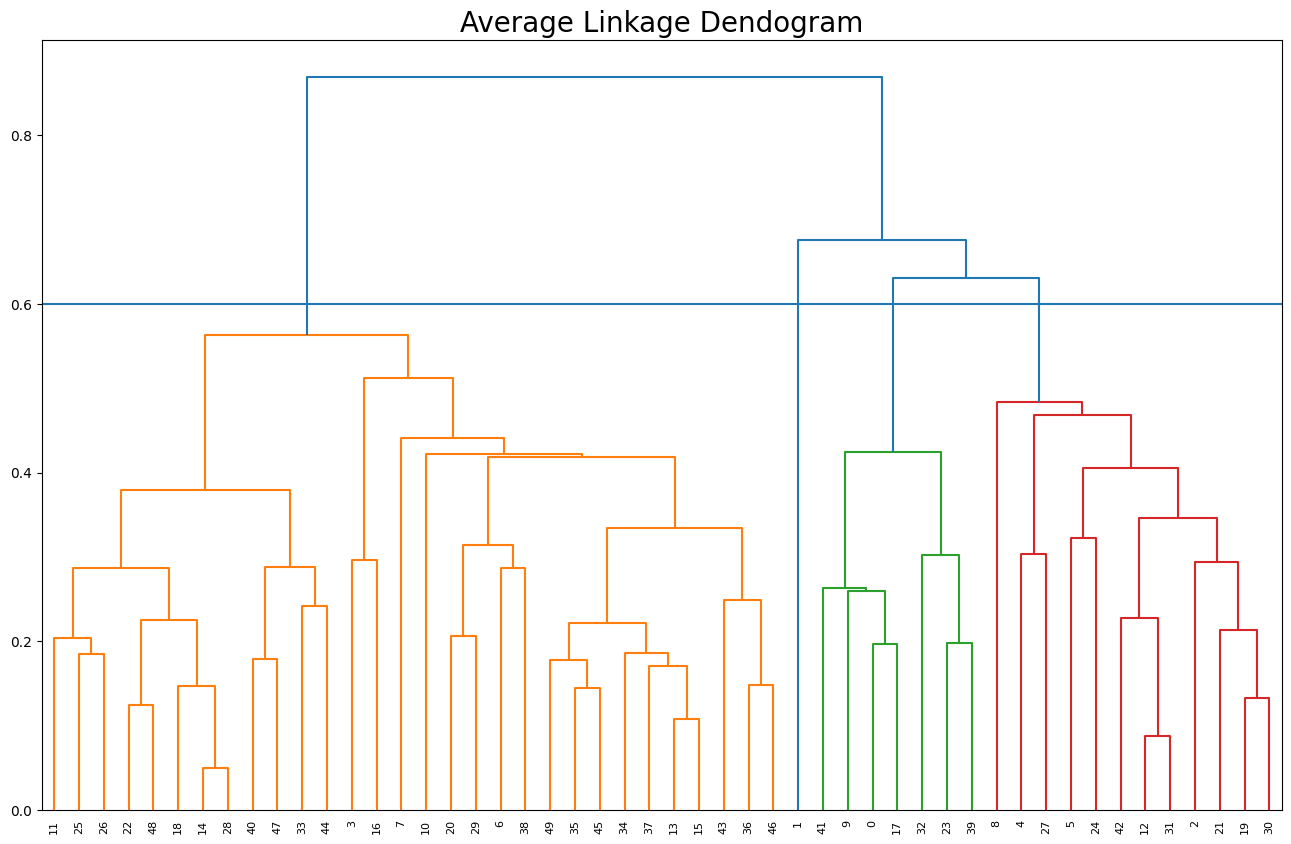

In [36]:
fig=plt.figure(figsize=(16,10))
dendogram=sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.title('Average Linkage Dendogram', size=20)
plt.axhline(y=0.6)

In [37]:
hie_clustering_3=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')

In [38]:
pred_y_3=hie_clustering_3.fit_predict(scaled_data)

In [39]:
crime_data['Cluster']=pred_y_3
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [40]:
crime_data['Cluster'].value_counts()

0    30
1    12
3     7
2     1
Name: Cluster, dtype: int64

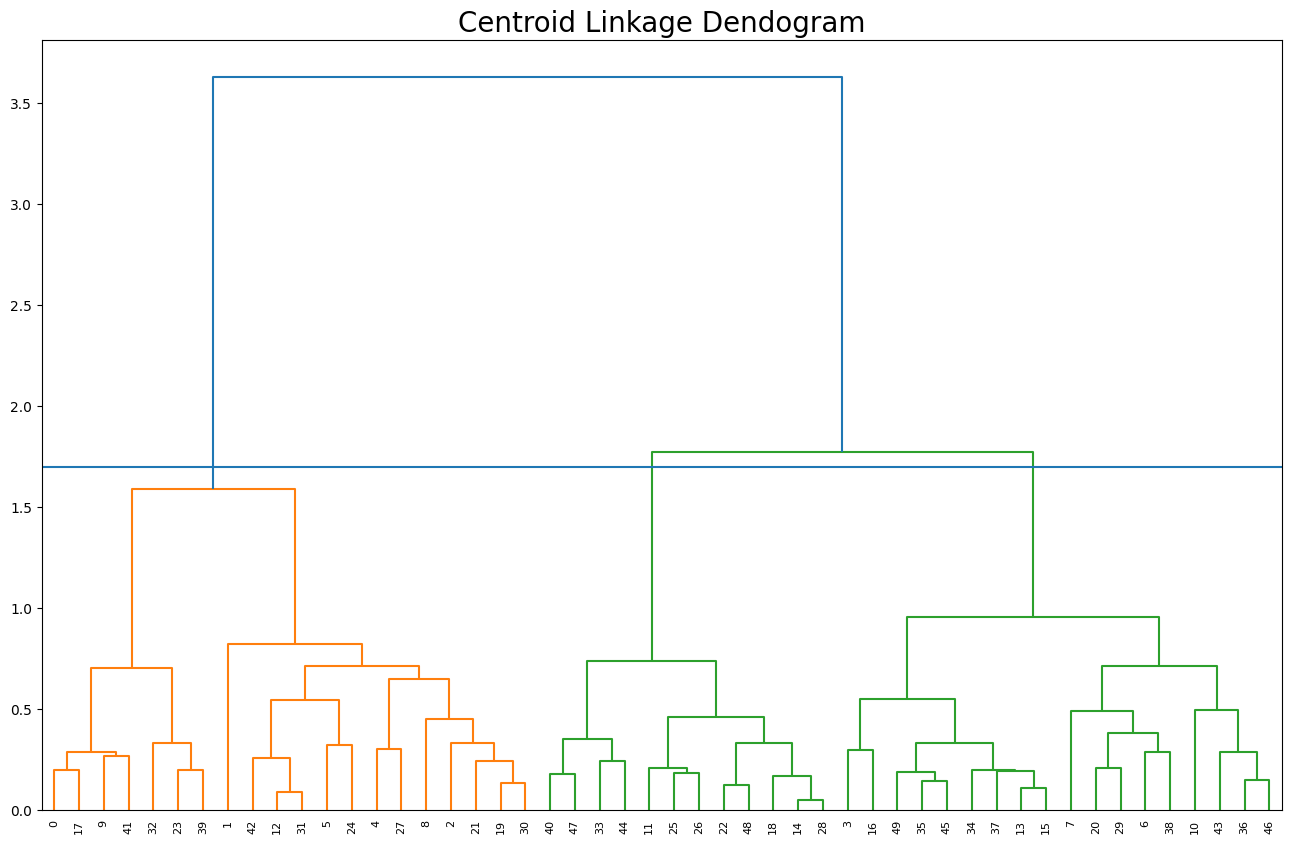

In [42]:
fig=plt.figure(figsize=(16,10))
dendogram=sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Centroid Linkage Dendogram', size=20)
plt.axhline(y=1.7)

In [49]:
hie_clustering_4=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [50]:
pred_y_4=hie_clustering_4.fit_predict(scaled_data)

In [51]:
crime_data['Cluster']=pred_y_4
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [52]:
crime_data['Cluster'].value_counts()

0    20
1    18
2    12
Name: Cluster, dtype: int64

**K-Means Clustering**

In [54]:
sse=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, random_state=12)
  kmeans.fit(scaled_data)
  sse.append(kmeans.inertia_)

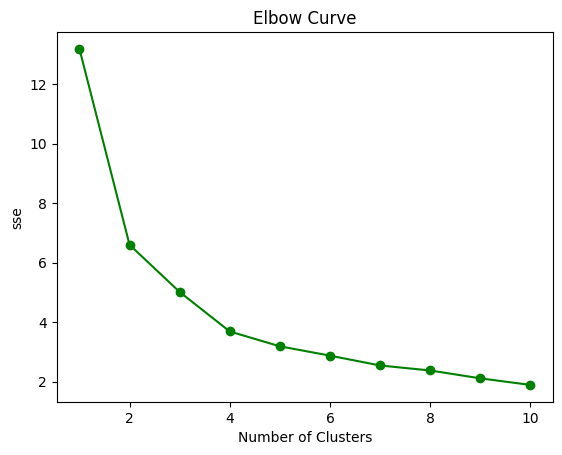

In [56]:
plt.plot(range(1,11), sse, 'bo-', color='g')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('sse')
plt.show()

In [57]:
kmeans_cluster=KMeans(4, random_state=42)
kmeans_cluster.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [58]:
y_pred_k=kmeans_cluster.fit_predict(scaled_data)

In [59]:
crime_data['Cluster']=y_pred_k
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [60]:
crime_data['Cluster'].value_counts()

3    17
0    13
1    12
2     8
Name: Cluster, dtype: int64

**DBSCAN Clustering**

In [61]:
dbscan=DBSCAN(eps=0.3, min_samples=3)
dbscan.fit(scaled_data)

DBSCAN(eps=0.3, min_samples=3)

In [62]:
pred_db=dbscan.fit_predict(scaled_data)

In [63]:
crime_data['Cluster_DBSCAN']=pred_db
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster,Cluster_DBSCAN
0,Alabama,13.2,236,58,21.2,2,0
1,Alaska,10.0,263,48,44.5,1,-1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,2,1
4,California,9.0,276,91,40.6,1,-1


In [64]:
silhouette_SLM=(metrics.silhouette_score(scaled_data,pred_y_1))
silhouette_SLM

0.21033337025958487

In [65]:
silhouette_CLM=(metrics.silhouette_score(scaled_data,pred_y_2))
silhouette_CLM

0.3060729442426308

In [66]:
silhouette_ALM=(metrics.silhouette_score(scaled_data,pred_y_3))
silhouette_ALM

0.36992391140277175

In [67]:
silhouette_CenLM=(metrics.silhouette_score(scaled_data,pred_y_4))
silhouette_CenLM

0.31916915428121284

In [69]:
silhouette_KMeans=(metrics.silhouette_score(scaled_data,y_pred_k))
silhouette_KMeans

0.34089035600743633

In [70]:
silhouette_DBSCAN=(metrics.silhouette_score(scaled_data,pred_db))
silhouette_DBSCAN

0.2473858809927262

In [71]:
tabel={'Clustering Models':['HC Single Linkage', 'HC Complete Linkage', 'HC Average Linkage',
                            'HC Centroid Linkage', 'KMeans', 'DBSCAN'],
       'Silhouette Score':[silhouette_SLM, silhouette_CLM, silhouette_ALM, silhouette_CenLM,
                           silhouette_KMeans, silhouette_DBSCAN]
       }

tabel=pd.DataFrame(tabel)
tabel

,Clustering Models,Silhouette Score
0,HC Single Linkage,0.210333
1,HC Complete Linkage,0.306073
2,HC Average Linkage,0.369924
3,HC Centroid Linkage,0.319169
4,KMeans,0.340890
5,DBSCAN,0.247386
